<a href="https://colab.research.google.com/github/KomalMano/Story/blob/master/7_Group_by(Split_apply_combine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from google.colab import files
import numpy as np
import io

In [23]:
uploaded = files.upload()

Saving weather_by_cities.csv to weather_by_cities (1).csv


In [24]:

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "weather_by_cities.csv" with length 373 bytes


In [25]:
uploaded

{'weather_by_cities.csv': b'day,city,temp,windspeed,event\r\n1/1/2017,new york,32,6,Rain\r\n1/2/2017,new york,36,7,Sunny\r\n1/3/2017,new york,28,12,Snow\r\n1/4/2017,new york,33,7,Sunny\r\n1/1/2017,mumbai,90,5,Sunny\r\n1/2/2017,mumbai,85,12,Fog\r\n1/3/2017,mumbai,87,15,Fog\r\n1/4/2017,mumbai,92,5,Rain\r\n1/1/2017,paris,45,20,Sunny\r\n1/2/2017,paris,50,13,Cloudy\r\n1/3/2017,paris,54,8,Cloudy\r\n1/4/2017,paris,42,10,Cloudy\r\n'}

In [26]:
df = pd.read_csv(io.StringIO(uploaded['weather_by_cities.csv'].decode('utf-8')))
df

,day,city,temp,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [27]:
#now i am goging to group by this data base on cities
g = df.groupby('city')#in the bracket u mention the column that u want to use for grouping
#the above line g=df,groupby('city') is similar to SQL
#SELECT * from city_data GROUP BY city #this is similar to this g = df.groupby('city')
#so i am passing city column group as argument
g
#when i run this then get DataFrameGroupBy object

In [28]:
#how can access these DataFrameGroup 
for city, city_df in g: # so there is an iterator that DataFrameGroupBy object provide which can iterate through each city and corsponding dataframe too.
  print(city)# i have membai as a key
  print(city_df)# and dataframe is corrosponding to mumbai as a value.

mumbai
        day    city  temp  windspeed  event
4  1/1/2017  mumbai    90          5  Sunny
5  1/2/2017  mumbai    85         12    Fog
6  1/3/2017  mumbai    87         15    Fog
7  1/4/2017  mumbai    92          5   Rain
new york
        day      city  temp  windspeed  event
0  1/1/2017  new york    32          6   Rain
1  1/2/2017  new york    36          7  Sunny
2  1/3/2017  new york    28         12   Snow
3  1/4/2017  new york    33          7  Sunny
paris
         day   city  temp  windspeed   event
8   1/1/2017  paris    45         20   Sunny
9   1/2/2017  paris    50         13  Cloudy
10  1/3/2017  paris    54          8  Cloudy
11  1/4/2017  paris    42         10  Cloudy


In [29]:
#u want to access specific dataframe use get_group
g.get_group('mumbai')

,day,city,temp,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [33]:
#before this 1st divide the data sets into different groups based on city and then u are running analytics on each of these groups and then u are combining the results into single dataframe.
#so this process of dividing ur data into multiple groups and then apply some analytics to get aggregated results is called split apply combine.
#conclusion : split ,apply means working on single group and combine these groups results. 
#get max temp
g.max()

,day,temp,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [34]:
#now calculate the avg speed of wind
g.mean()

,temp,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [36]:
#if u want to get all analytics in 1 shot.
g.describe()

temp                                ... windspeed                         
         count   mean       std   min    25%  ...       min   25%   50%    75%   max
city                                          ...                                   
mumbai     4.0  88.50  3.109126  85.0  86.50  ...       5.0  5.00   8.5  12.75  15.0
new york   4.0  32.25  3.304038  28.0  31.00  ...       6.0  6.75   7.0   8.25  12.0
paris      4.0  47.75  5.315073  42.0  44.25  ...       8.0  9.50  11.5  14.75  20.0

[3 rows x 16 columns]

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

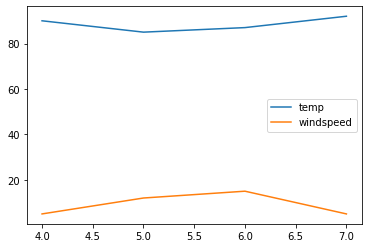

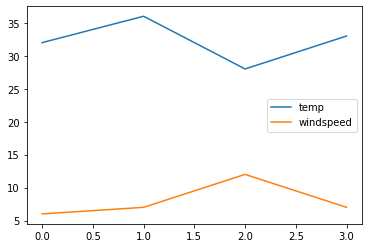

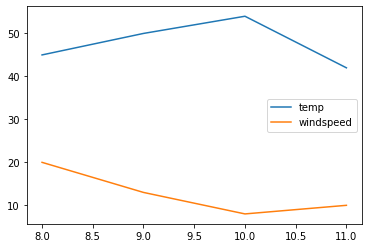

In [37]:
#u can also do some plotting
%matplotlib inline
g.plot()

In [ ]:
#u can search all the data for grouping .So go on google by pandas groupby.